In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, LogLocator
from matplotlib.font_manager import FontProperties
from pathlib import Path
import matplotlib as mpl

methods = ["gurobi", "simulated_annealing"]
graphs = ["clique", "cycle", "star", "chain", "tree"]

fpath = Path(mpl.get_data_path(), "C:\\Users\\valte\\OneDrive - University of Helsinki\\Desktop\\linux_libertine\\LinLibertine_R.ttf")
custom_font = FontProperties(fname=fpath, size=16)

path = "..\\results\\DP\\"

def read_json_files(path):
    results = {}
    for filename in os.listdir(path):
        if filename.endswith(".json"):
            with open(path + filename) as f:
                nodes = filename.split("_")[-1]
                nodes = nodes.split(".")[0]
                cost = json.load(f)["join_order_cost"]
                results[int(nodes)] = {"vldb24_cost": cost}
    return results

def read_dynamic_programming_results(path, results):
    for filename in os.listdir(path):
        if filename.endswith(".json"):
            with open(path + filename) as f:
                nodes = filename.split("_")[-1]
                nodes = nodes.split(".")[0]
                nodes = int(nodes)
                doc = json.load(f)
                cost = doc["optimal_cost"]
                if nodes in results:
                    results[nodes]["dynamic_programming_cost"] = cost
    return results

def plot(data, graph_name, method_name, readout = False):
    # Compute the ratio of vldb24_cost to dynamic_programming_cost for each key
    ratios = {key: val['vldb24_cost'] / val['dynamic_programming_cost'] for key, val in data.items()}

    # Extract keys (x-axis) and ratios (y-axis)
    keys = sorted(ratios.keys())
    values = [ratios[k] for k in keys]

    # Plotting
    plt.figure(figsize=(10, 6))
    smoke_gray = '#e0e4dd'
    # Set the face color with smoke_gray
    plt.gcf().set_facecolor(smoke_gray)
    # Add labels and title
    if readout:
        label = 'Digital Annealing vs. Dynamic Programming with readout'
    else:
        label = 'Digital Annealing vs. Dynamic Programming without readout'
    plt.plot(keys, values, marker='o', linestyle='-', color='b', label=label)
    
    # Add labels and title
    plt.title(f'Digital Annealing vs. Dynamic Programming for {graph_name} graphs')
    plt.xlabel('# Nodes')
    plt.ylabel('Cost Ratio (1 is optimal)')
    plt.xticks(keys)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    
    # Save the plot
    plt.savefig(f'vldb24_reprod_figures\\{graph_name}_{method_name}.png')


gurobi
simulated_annealing


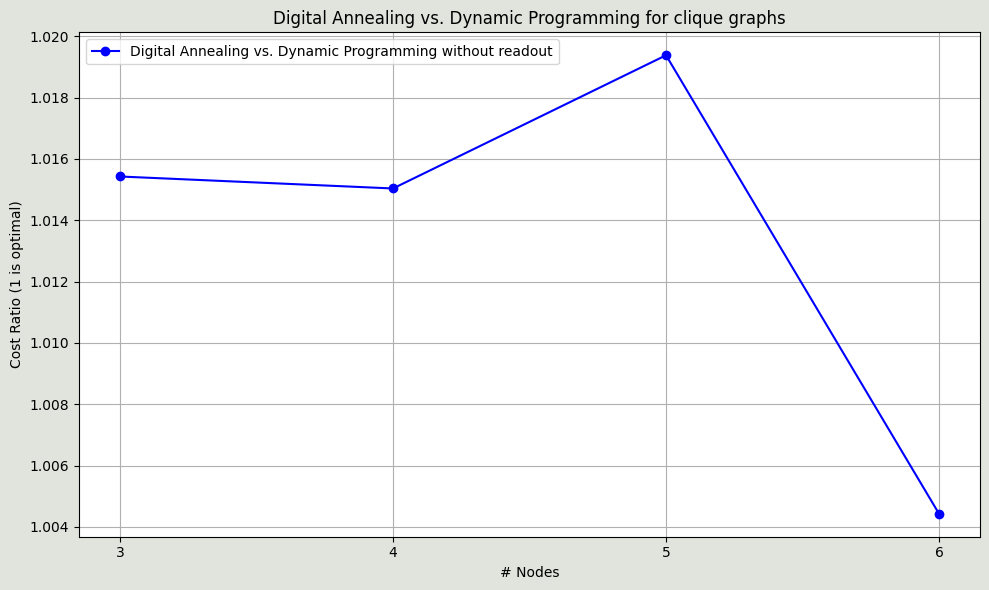

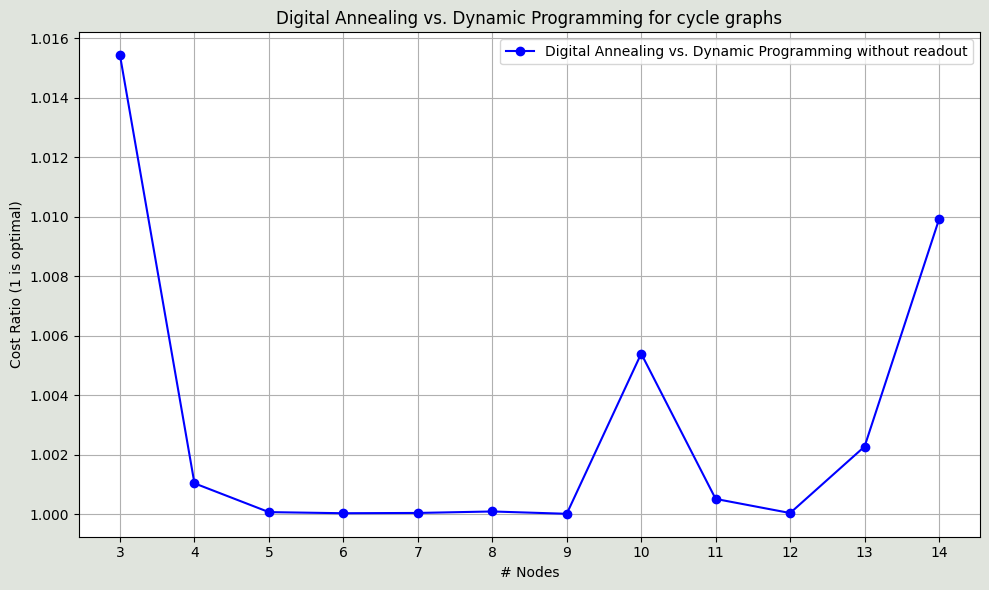

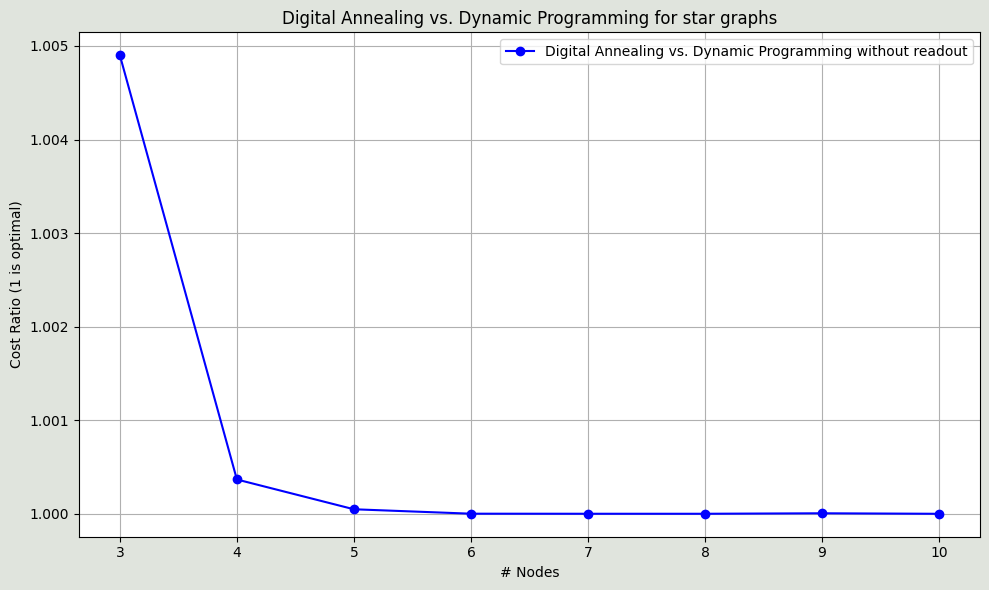

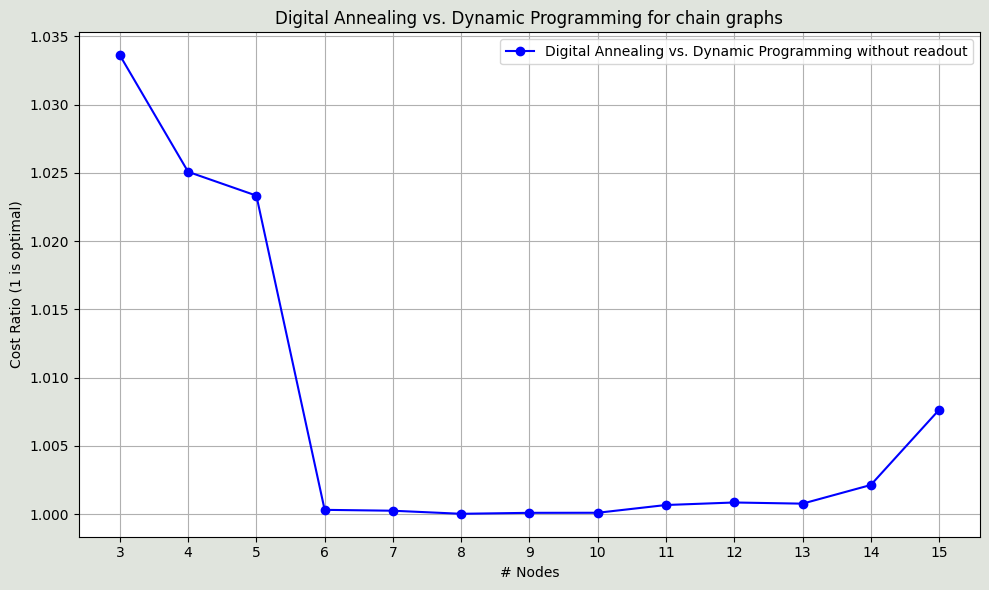

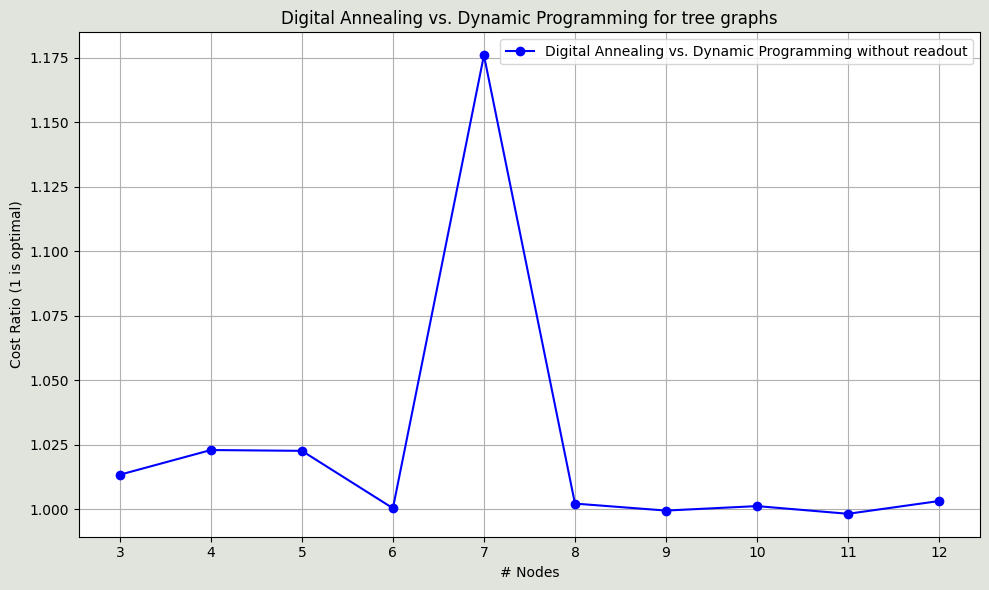

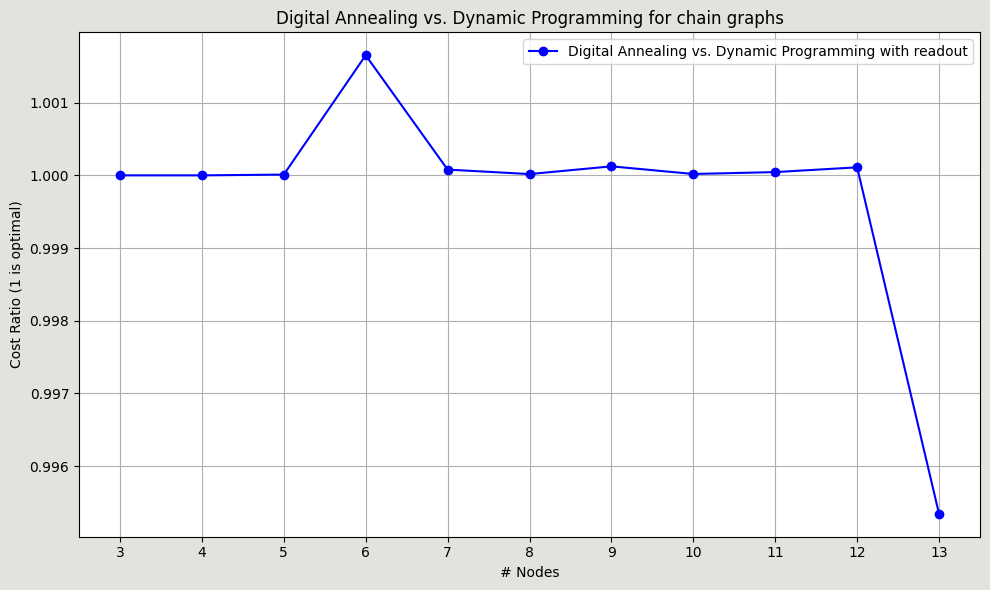

In [2]:
for method in methods:
    print(method)
    for graph in graphs:
        folder_path = "..\\results\\vldb24\\" + method + "\\" + graph + "\\"
        res = read_json_files(folder_path)
        folder_path = path + graph + "\\"
        res = read_dynamic_programming_results(folder_path, res)
        if len(res) > 0:
            readout = method == "simulated_annealing"
            plot(res, graph, method, readout)